**Gauß- and Laplace-Kernel**

*Libaries*

In [32]:
import numpy as np
from matplotlib import pyplot as plt

*Let us look at the following image*

In [33]:
img = np.array([[0,0,0,0,0,0,0 ],
                [0,0,1,2,3,3,0 ],
                [0,1,1,2,3,3,0 ],
                [0,1,2,2,3,3,0 ],
                [0,1,2,2,3,3,0 ],
                [0,2,2,3,3,3,0 ],
                [0,0,0,0,0,0,0 ]])

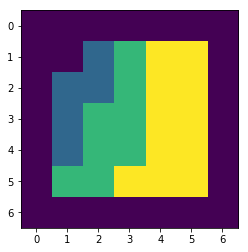

In [34]:
plt.figure()
plt.imshow(img)
plt.show()

*Now we definie a function to select our kernels:*

In [35]:
def choose_kernel(sort):
    if sort == "gauss":
        return np.array([[1, 2, 1], [2, 4, 2],[1, 2, 1]])/16
    elif sort == "laplace":
        return np.array([[0, -1, 0], [-1, 4, -1],[0, -1, 0]])/9
    else:
        return None


*visualization:*

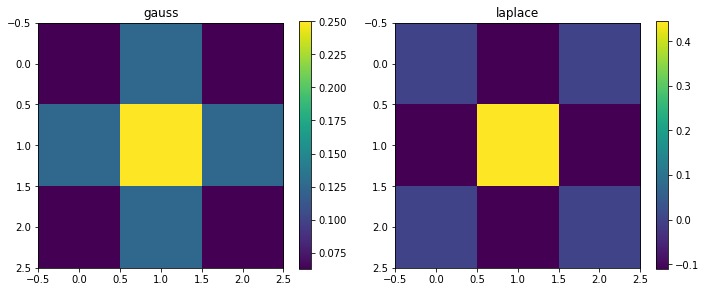

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("gauss")
plt.imshow(choose_kernel("gauss"))
plt.colorbar()
plt.subplot(122)
plt.title("laplace")
plt.imshow(choose_kernel("laplace"))
plt.colorbar()
plt.tight_layout()
plt.show()

*To apply this filter to our image we have to do a convolution:*

In [37]:
def convul(img,kernel):

    img_filtered = np.zeros_like(img, dtype=float)

    for x in range(1,img.shape[0]-1):
        for y in range(1,img.shape[1]-1):
            neighborhood_and_resident = np.array([[img[x-1,y+1],img[x,y+1],img[x+1,y+1]],
                                                  [img[x-1,y],img[x,y],img[x+1,y]],
                                                  [img[x-1,y-1],img[x,y-1],img[x+1,y-1]]])

            tmp_conv = np.sum(kernel * neighborhood_and_resident)
            img_filtered[x,y] = tmp_conv
            
    return img_filtered

In [38]:
img_gauss_filtered = convul(img,choose_kernel("gauss"))
img_laplace_filtered = convul(img,choose_kernel("laplace"))

*the results in matrix form:*

In [39]:
print(np.around(img_gauss_filtered,2))
print(np.around(img_laplace_filtered,2))

[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.31 0.81 1.5  2.06 1.69 0.  ]
 [0.   0.69 1.31 2.06 2.75 2.25 0.  ]
 [0.   0.94 1.62 2.19 2.75 2.25 0.  ]
 [0.   1.12 1.88 2.38 2.81 2.25 0.  ]
 [0.   1.   1.56 1.94 2.19 1.69 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]
[[ 0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.22  0.11  0.22  0.44  0.67  0.  ]
 [ 0.    0.22 -0.22  0.    0.11  0.33  0.  ]
 [ 0.    0.    0.22 -0.11  0.11  0.33  0.  ]
 [ 0.   -0.11  0.11 -0.22  0.11  0.33  0.  ]
 [ 0.    0.56  0.11  0.56  0.33  0.67  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.  ]]


*and in matrix form:*

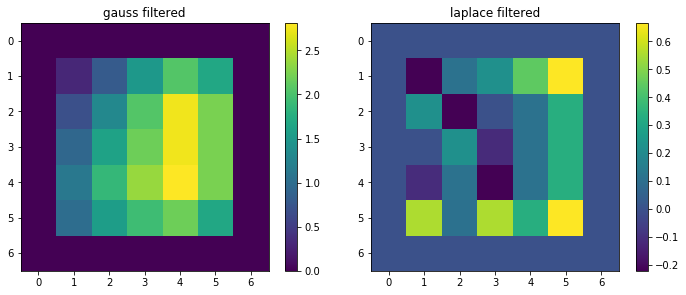

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("gauss filtered")
plt.imshow(img_gauss_filtered)
plt.colorbar()
plt.subplot(122)
plt.title("laplace filtered")
plt.imshow(img_laplace_filtered)
plt.colorbar()
plt.tight_layout()
plt.show()

*And for a 'real' world image:*

In [42]:
boat = plt.imread("images/boat.tiff")

In [48]:
boat_gauss = convul(boat,choose_kernel("gauss"))
boat_laplace = convul(boat,choose_kernel("laplace"))

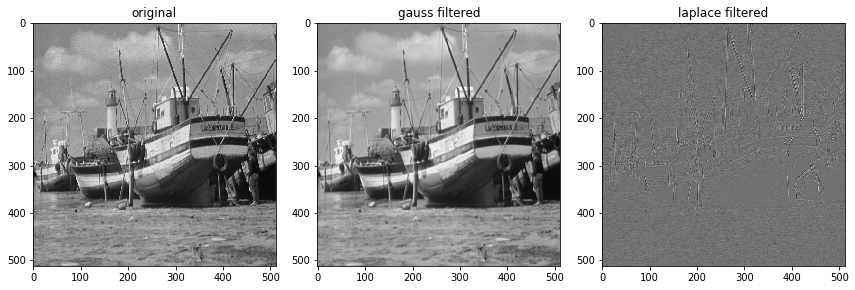

In [51]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title("original")
plt.imshow(boat,cmap="gray")

plt.subplot(132)
plt.title("gauss filtered")
plt.imshow(boat_gauss,cmap="gray")

plt.subplot(133)
plt.title("laplace filtered")
plt.imshow(boat_laplace,cmap="gray")

plt.tight_layout()
plt.show()